## DATA

### For Pohara

#### Discharge

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats 
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as st
from statsmodels.graphics.tsaplots import plot_acf

C:\Users\Claus\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### To get averge from dataset 

In [2]:
dis_430 = pd.read_csv('Discharge/430/Yr Book/AVQ430.txt',skiprows=9, nrows=24, sep='\s+')

get_dis_430_ave=dis_430.iloc[22]
#display(dis_430)
display(get_dis_430_ave)
#display(float(get_dis_430_ave[1]))

Year      Average:
Jan.          12.9
Feb.          11.4
Mar.          11.3
Apr.          13.0
May           19.1
Jun.          49.8
Jul.           130
Aug.           147
Sep.           103
Oct.          54.5
Nov.          25.3
Dec.          16.9
Year.1        49.5
Name: 22, dtype: object

#### From str to float for all

In [3]:
dis_average=np.zeros(13)
for i in range(1,13):
    dis_average[i]=float(get_dis_430_ave[i])
    
display(dis_average[1:13])

dis_430_ave = dis_average[1:13]
dis_430_ave = pd.Series(dis_430_ave)
display(dis_430_ave)

array([ 12.9,  11.4,  11.3,  13. ,  19.1,  49.8, 130. , 147. , 103. ,
        54.5,  25.3,  16.9])

0      12.9
1      11.4
2      11.3
3      13.0
4      19.1
5      49.8
6     130.0
7     147.0
8     103.0
9      54.5
10     25.3
11     16.9
dtype: float64

#### Precipitation

In [4]:
pohara_pre_raw=pd.read_csv('Preci/precip/prec_Pohara.csv',na_values=-99.9)
pohara_pre_raw['Time']=pd.to_datetime(pohara_pre_raw['Time'])
display()

##### Clean dataset

In [5]:
idx_first_non_nan=pohara_pre_raw['Precipitation (mm)'].first_valid_index()

In [6]:
pohara_pre_raw['Time'].iloc[0]

Timestamp('1968-01-01 00:00:00')

In [7]:
pohara_pre=pohara_pre_raw
pohara_month_pre=pohara_pre.groupby(pohara_pre.Time.dt.month).mean()
#display(pohara_month_pre)

In [8]:
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
pohara_month_pre['month']=label
#pohara_month_pre.index = pohara_month_pre['month'] # Maybe not important
pohara_month_pre['prec']=pohara_month_pre['Precipitation (mm)']
display(pohara_month_pre)

,Precipitation (mm),month,prec
Time,,,
1,0.723593,Jan,0.723593
2,1.195926,Feb,1.195926
3,1.905223,Mar,1.905223
4,4.156270,Apr,4.156270
5,11.531221,May,11.531221
6,21.850969,Jun,21.850969
7,29.960698,Jul,29.960698
8,27.277419,Aug,27.277419
9,20.687093,Sep,20.687093


#### Temperature 

In [9]:
pohara_temp = pd.read_csv('temp/temp_Pohara.csv',na_values=-99.9)
pohara_temp['Time']=pd.to_datetime(pohara_temp['Time'])
pohara_temp['Mean temp'] = (pohara_temp['Tmax']+pohara_temp['Tmin'])/2
#display(pohara_temp)

In [10]:
pohara_month_temp=pohara_temp.groupby(pohara_temp.Time.dt.month).mean()
display(pohara_month_temp)
#pohara_month_temp=pohara_month_temp.reset_index
#display(pohara_month_temp)

,Tmax,Tmin,Mean temp
Time,,,
1,19.321462,7.062741,13.176594
2,21.844041,8.965803,15.404922
3,26.507632,12.477183,19.492408
4,29.724085,15.570033,22.646498
5,29.886919,18.278960,24.082939
6,30.206291,20.757680,25.481643
7,29.712989,21.826980,25.769569
8,29.861651,21.824306,25.844277
9,28.941766,20.633626,24.788129


### Make dataframe for correlation

In [11]:
display(len(pohara_month_pre['prec']))
display(len(pohara_month_temp['Mean temp']))
display(len(dis_430_ave))

display(type(pohara_month_pre['prec']))
display(type(pohara_month_temp['Mean temp']))
display(type(dis_430_ave))

12

12

12

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

#### Reset index for:

In [12]:
pohara_month_pre=pohara_month_pre.reset_index(drop=True)
pohara_month_temp=pohara_month_temp.reset_index(drop=True)

In [13]:
d = {'Precip':pohara_month_pre['prec'],
    'Temp': pohara_month_temp['Mean temp'] ,
    'Discharge': dis_430_ave[0:12]}
cor_df_pohara =pd.DataFrame(d)
cor_df_pohara

,Discharge,Precip,Temp
0,12.9,0.723593,13.176594
1,11.4,1.195926,15.404922
2,11.3,1.905223,19.492408
3,13.0,4.156270,22.646498
4,19.1,11.531221,24.082939
5,49.8,21.850969,25.481643
6,130.0,29.960698,25.769569
7,147.0,27.277419,25.844277
8,103.0,20.687093,24.788129
9,54.5,5.269092,21.818133


#### Analysis

In [14]:
cor_df_pohara.corr()

,Discharge,Precip,Temp
Discharge,1.000000,0.894414,0.686686
Precip,0.894414,1.000000,0.837039
Temp,0.686686,0.837039,1.000000


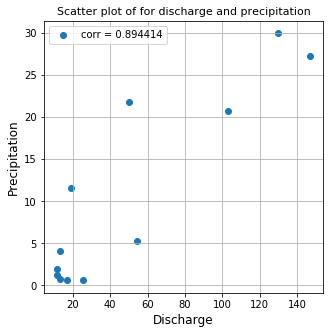

In [15]:
plt.figure(figsize=(5,5))

plt.scatter(cor_df_pohara['Discharge'], cor_df_pohara['Precip'], label='corr = 0.894414')
plt.title('Scatter plot of for discharge and precipitation', size=11)
plt.xlabel('Discharge', size = 12)
plt.ylabel('Precipitation', size = 12)
plt.legend(loc = 'upper left')

plt.grid(True)

#### Regression  with the independent variable that has the best corralation (simple regression)

In [16]:
dis_pre = smf.ols(formula='Discharge ~ Precip',data=cor_df_pohara).fit()
#dis_pre.summary()

In [17]:
r2_dis_pre = dis_pre.rsquared
display(r2_dis_pre)

0.7999765361519535

#### Regression equation

In [18]:
alpha_pre = dis_pre.params[0]
beta_pre = dis_pre.params[1]

dis_pre_calc = alpha_pre + beta_pre*cor_df_pohara['Precip']

In [19]:
print('r-squared is: ' +str(r2_dis_pre.round(3)))
print('Regression equation: y = {} + {}*pre'.format(alpha_pre.round(3),(beta_pre.round(3))))

r-squared is: 0.8
Regression equation: y = 8.497 + 3.913*pre


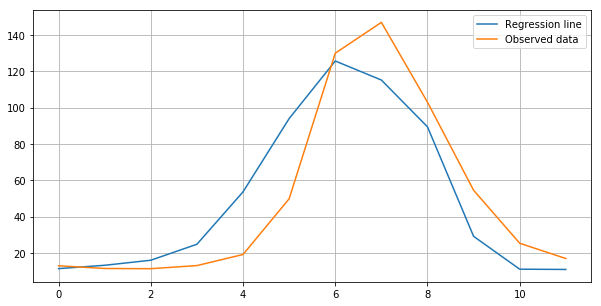

In [20]:
plt.figure(figsize=(10,5))

#plt.suptitle('Figures for every step in the Multiple linear regression ', size=16)

beta_pre = dis_pre.params[1]


#plt.title('Regression equation: y = {} + {}*X1'.format(alpha_pre.round(3),(beta_pre.round(3))))
plt.plot(dis_pre_calc,label='Regression line')
plt.plot(cor_df_pohara['Discharge'],label='Observed data')
plt.legend()
plt.grid(True)

#### Multiple regression and temperature  

In [21]:
dis_pre_temp = smf.ols(formula='Discharge ~ Precip+Temp',data=cor_df_pohara).fit()

In [22]:
r2_dis_pre_temp = dis_pre_temp.rsquared
display(r2_dis_pre_temp)

0.8128061739134104

#### Regression equation

In [23]:
alpha_pre_temp = dis_pre_temp.params[0]
beta_pre = dis_pre_temp.params[1]
beta_temp = dis_pre_temp.params[2]

dis_pre_temp_calc = alpha_pre + beta_pre*cor_df_pohara['Precip']+beta_temp*cor_df_pohara['Temp']

In [24]:
print('r-squared is: ' +str(r2_dis_pre_temp.round(3)))
print('Regression equation: y = {} + {}*X1 + {}*X2'.format(alpha_pre_temp.round(3),beta_pre.round(3),beta_temp.round(3)))

r-squared is: 0.813
Regression equation: y = 45.882 + 4.671*X1 + -2.172*X2


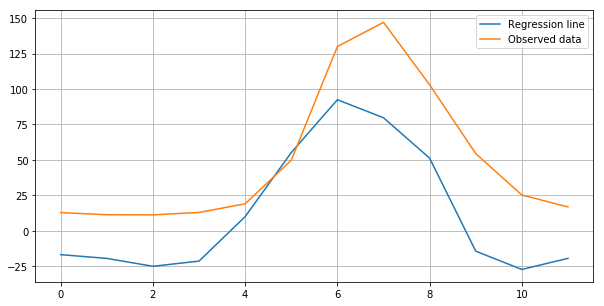

In [25]:
plt.figure(figsize=(10,5))

#plt.suptitle('Figures for every step in the Multiple linear regression ', size=16)

beta_pre = dis_pre_temp.params[1]
beta_temp = dis_pre_temp.params[2]

#plt.title('Regression equation: y = {} + {}*X1'.format(alpha_pre.round(3),(beta_pre.round(3))))
plt.plot(dis_pre_temp_calc,label='Regression line')
plt.plot(cor_df_pohara['Discharge'],label='Observed data')
plt.legend()
plt.grid(True)

### F-test 

In [26]:
from scipy import stats 

In [27]:
N=len(cor_df_pohara['Discharge'])
n = 2
a = 0.05

F_c = ((1-r2_dis_pre)*(N-n-1))/((1-r2_dis_pre_temp)*(N-n-2))

F_value = stats.f.ppf(1-a,N-n-1,N-n-2)

#display(N)
display(F_c.round(3))
display(F_value.round(3))

1.202

3.388

The F-test shows that, $F_c$ < $F_{1-\alpha,N-n-1,N-n-2} \rightarrow$ 1.202 < 3.388, and therefore is the addition of the independent variable temperature not significant. 

Did check for temperatures from station lete which is higher and we got : $F_c$ < $F_{1-\alpha,N-n-1,N-n-2} \rightarrow$ 1.18 < 3.388, and therefore is the addition of the independent variable temperature not significant. 

### Multiple regression for precipitation for stations in higher terrain

In [28]:
lete_pre_raw=pd.read_csv('Preci/precip/prec_Lete.csv',na_values=-99.9)
lete_pre_raw['Time']=pd.to_datetime(lete_pre_raw['Time'])

lumle_pre_raw=pd.read_csv('Preci/precip/prec_Lumle.csv',na_values=-99.9)
lumle_pre_raw['Time']=pd.to_datetime(lumle_pre_raw['Time'])

In [29]:
idx_first_non_nan_lete=lete_pre_raw['Precipitation (mm)'].first_valid_index()
idx_first_non_nan_lumle=lumle_pre_raw['Precipitation (mm)'].first_valid_index()
display(idx_first_non_nan_lete)
display(idx_first_non_nan_lumle)

138

320

In [30]:
display(lete_pre_raw['Time'].iloc[138])
display(lumle_pre_raw['Time'].iloc[320])

Timestamp('1969-05-19 00:00:00')

Timestamp('1969-11-17 00:00:00')

In [31]:
#display(lete_pre_raw[lete_pre_raw.Time.dt.year==1970].index.values.astype(int))
#display(lumle_pre_raw[lumle_pre_raw.Time.dt.year==1970].index.values.astype(int))

In [32]:
lete_pre=lete_pre_raw[365:]
lumle_pre=lumle_pre_raw[365:]

In [33]:
lete_month_pre=lete_pre.groupby(lete_pre.Time.dt.month).mean()
lumle_month_pre=lumle_pre.groupby(lumle_pre.Time.dt.month).mean()
lete_month_pre['prec']=lete_month_pre['Precipitation (mm)']
lumle_month_pre['prec']=lumle_month_pre['Precipitation (mm)']
#display(lumle_month_pre)

In [34]:
lete_month_pre=lete_month_pre.reset_index(drop=True)
lumle_month_pre=lumle_month_pre.reset_index(drop=True)

In [35]:
df = {'prec_pohara':pohara_month_pre['prec'],
    'prec_lete': lete_month_pre['prec'],
    'prec_lumle': lumle_month_pre['prec'],
    'Discharge': dis_430_ave[0:12]}
cor_df =pd.DataFrame(df)
cor_df

,Discharge,prec_lete,prec_lumle,prec_pohara
0,12.9,0.959835,1.005444,0.723593
1,11.4,1.986442,1.681062,1.195926
2,11.3,3.157984,1.988952,1.905223
3,13.0,3.526083,3.723333,4.156270
4,19.1,3.901574,10.203508,11.531221
5,49.8,5.431220,29.348750,21.850969
6,130.0,7.996617,46.615202,29.960698
7,147.0,7.744099,45.021573,27.277419
8,103.0,4.718830,28.722583,20.687093
9,54.5,1.853619,6.961573,5.269092


In [36]:
cor_df.corr()

,Discharge,prec_lete,prec_lumle,prec_pohara
Discharge,1.000000,0.821320,0.936700,0.894414
prec_lete,0.821320,1.000000,0.936326,0.942924
prec_lumle,0.936700,0.936326,1.000000,0.988314
prec_pohara,0.894414,0.942924,0.988314,1.000000


In [37]:
dis_pre_lum = smf.ols(formula='Discharge ~ prec_lumle',data=cor_df).fit()

In [38]:
r2_dis_pre_lum =dis_pre_lum.rsquared
display(r2_dis_pre_lum)

0.8774061265437594

In [39]:
alpha_lum = dis_pre_lum.params[0]
beta_lum = dis_pre_lum.params[1]

dis_pre_lum_calc = alpha_lum + beta_lum*cor_df['prec_lumle']

In [40]:
print('r-squared is: ' +str(r2_dis_pre_lum.round(3)))
print('Regression equation: y = {} + {}*X(pre_lumle)'.format(alpha_lum.round(3),(beta_lum.round(3))))

r-squared is: 0.877
Regression equation: y = 10.919 + 2.619*X(pre_lumle)


### Add one more independent variable that has higher partial correlation with the dependent (X(pre_pohara)

In [41]:
dis_pre_lum_poha = smf.ols(formula='Discharge ~ prec_lumle+prec_pohara',data=cor_df).fit()

In [42]:
r2_dis_pre_lum_poha =dis_pre_lum_poha.rsquared
display(r2_dis_pre_lum_poha)

0.9196776878713828

In [44]:
alpha_lum_poha = dis_pre_lum_poha.params[0]
beta_lum = dis_pre_lum_poha.params[1]
beta_poha = dis_pre_lum_poha.params[2]


dis_pre_lum_poha_calc = alpha_lum + beta_lum*cor_df['prec_lumle'] + beta_poha*cor_df['prec_pohara']

In [46]:
print('r-squared is: ' +str(r2_dis_pre_lum.round(3)))
print('Regression equation: y = {} + {}*X(pre_lumle) + {}*X(pre_pohara)'.format(alpha_lum.round(3),(beta_lum.round(3)),(beta_poha.round(3))))

r-squared is: 0.877
Regression equation: y = 10.919 + 6.347*X(pre_lumle) + -5.9*X(pre_pohara)


#### F-test

In [62]:
N=len(cor_df['Discharge'])
n = 2
a = 0.05

F_c = ((1-r2_dis_pre_lum)*(N-n-1))/((1-r2_dis_pre_lum_poha)*(N-n-2))

F_value = stats.f.ppf(1-a,N-n-1,N-n-2)

#display(N)
display(F_c.round(3))
display(F_value.round(3))

1.717

3.388

The F-test shows that, $F_c$ < $F_{1-\alpha,N-n-1,N-n-2} \rightarrow$ 1.717 < 3.388, and therefore is the addition of the independent variable precipitation for Pohara not significant. And we stop our multiple regression.

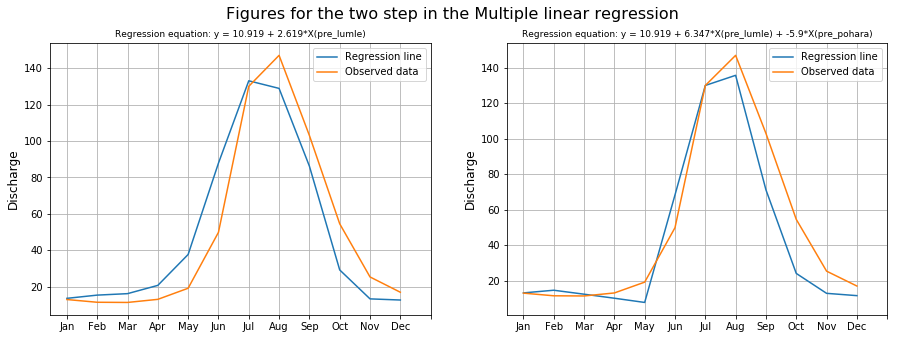

In [61]:
label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
x = np.arange(13)

plt.figure(figsize=(15,5))

plt.suptitle('Figures for the two step in the Multiple linear regression ', size=16)

alpha_lum = dis_pre_lum.params[0]
beta_lum = dis_pre_lum.params[1]

plt.subplot(121)
plt.title('Regression equation: y = {} + {}*X(pre_lumle)'.format(alpha_lum.round(3),(beta_lum.round(3))), size = 9)
plt.plot(dis_pre_lum_calc,label='Regression line')
plt.plot(cor_df['Discharge'],label='Observed data')
plt.ylabel('Discharge', size = 12)
plt.xticks(x,label)
plt.legend()
plt.grid(True)

alpha_lum_poha = dis_pre_lum_poha.params[0]
beta_lum = dis_pre_lum_poha.params[1]
beta_poha = dis_pre_lum_poha.params[2]

plt.subplot(122)
plt.title('Regression equation: y = {} + {}*X(pre_lumle) + {}*X(pre_pohara)'.format(alpha_lum.round(3),(beta_lum.round(3)),(beta_poha.round(3))),size =9)
plt.plot(dis_pre_lum_poha_calc,label='Regression line')
plt.plot(cor_df['Discharge'],label='Observed data')
plt.ylabel('Discharge', size = 12)
plt.xticks(x,label)
plt.legend()
plt.grid(True)

#plt.subplot(133)
#plt.title('Regression equation: y = {} + {}*X1'.format(alpha_pre.round(3),(beta_pre.round(3))))
#plt.plot(dis_pre_lum_calc,label='Regression line')
#plt.plot(cor_df['Discharge'],label='Observed data')
#plt.legend()
#plt.grid(True)